#Lab Assignment - 1
**2022-CS543 Reinforcement Learning Lab.** \\
Instructor : Shashi Shekhar Jha (shashi@iitrpr.ac.in)

** Due on 29-08-2022   2400 Hrs   (100 Marks) **

**Submission Instructions**:
All submissions are through google classroom, uploading a single colab notebook with .ipynb extension. Go to file->Download-> Download .ipynb in colab to download the file. 

In case you face any trouble with the submission, please contact the TAs:

Armaan Garg, 2019csz0002@iitrpr.ac.in	

Your submission must be your original work. Do not indulge in any kind of plagiarism or copying. Abide by the honour and integrity code to do your assignment.

Late submissions will attract penalties.

**Penalty Policy**: There will be a penalty of 5% for every 24 Hr delay in the submission. E.g. For the 1st 24 Hr delay the penalty will be 5%, for submission with a delay of >24 Hr and < 48 Hr, the penalty will be 10% and so on.


**Naming Instructions**:
Name the colab file submission as follows: \<YourName>_\<rollnumber>_Lab1.ipynb 

E.g. if your name is ABC, roll number is 2022csx1234 and submission is for lab1 then you should name the colab file as: ABC_2022csx1234_lab1.ipynb


**In this assignment, you will implement the Value Iteration, Policy Iteration and Monte Carlo Prediction. The assignment will focus on two openai Gym environments namely FrozenLake8x8-v0 and Taxi-v3 along with some real-world inspired problems.**

#Frozen lake environment

Environment 1: Understanding FrozenLake8x8


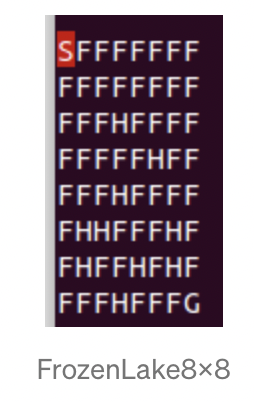


There are 64 states in the game. The agent starts from S (S for Start) and our goal is to get to G (G for Goal). The agent in the environment has four possible moves — Up, Down, Left and Right. 

So just go. Nope. It's a slippery surface. The F’s and the H’s in between are pretty weird stuff. So F means Frozen Surface. You can walk on them. But H means Hole. If you fall in a H, BOoom, GAME OVER for you and start from S again. So just go through all the F’s dodging the H’s to reach the G right. 

And there’s more. Since this is a “Frozen” Lake, so if you go in a certain direction, there is only a 0.333% chance that the agent will really go in that direction. I mean, the movement of the agent is uncertain and only partially depends on the chosen direction. So you won’t always move in the direction you intend. For a more detailed explanation of FrozenLake8x8 , https://gym.openai.com/envs/FrozenLake8x8-v0/

# Taxi environement

Description:
There are four designated locations in the grid world indicated by R(ed), G(reen), Y(ellow), and B(lue). When the episode starts, the taxi starts off at a random square and the passenger is at a random location. The taxi drives to the passenger's location, picks up the passenger, drives to the passenger's destination (another one of the four specified locations), and then drops off the passenger. Once the passenger is dropped off, the episode ends.

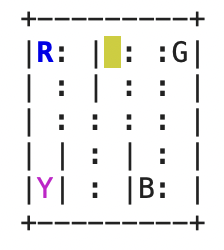

Observations: 
There are 500 discrete states since there are 25 taxi positions, 5 possible locations of the passenger (including the case when the passenger is in the taxi), and 4 destination locations. 

Passenger locations:
- 0: R(ed)
- 1: G(reen)
- 2: Y(ellow)
- 3: B(lue)
- 4: in taxi

Destinations:
- 0: R(ed)
- 1: G(reen)
- 2: Y(ellow)
- 3: B(lue)
    
Actions:
There are 6 discrete deterministic actions:
- 0: move south
- 1: move north
- 2: move east 
- 3: move west 
- 4: pickup passenger
- 5: dropoff passenger

Rewards: 
There is a default per-step reward of -1,
except for delivering the passenger, which is +20,
or executing "pickup" and "drop-off" actions illegally, which is -10.


Rendering:
- blue: passenger
- magenta: destination
- yellow: empty taxi
- green: full taxi
- other letters (R, G, Y and B): locations for passengers and destinations


state space is represented by:
    (taxi_row, taxi_col, passenger_location, destination)

https://gym.openai.com/envs/Taxi-v3/

# Questions on Gym Environments

**Note: all the observations should also be separately added/coded to the solution along with plots for better undersatnding of your results**


---


Q1. **Value Iteration**: Implement Value Iteration algorithm for the FrozenLake8x8-v0 and Taxi-v3. Use 5 different values of the $\gamma$ paramter i.e. $[ 0.1,0.3,0.5,0.7, 0.99]$ and record the number of iterations required to converge in each case. Plot a graph showing $\gamma$ values on x-axis and the corresponding number of iterations till convergances on y-axis for both the environments.
In another graph, plot the value function of the start state ($s_0$) for each value of $\gamma$ for the FrozenLake. In case of taxi environment select the max norm over the value function for comparison.

Write your observations from these plots. Does the different values of $\gamma$ result in the same policy for each envrionemnt? Briefly discuss based on your observations. **[ 20 points]**


---


Q2. **Policy iteration**: Implement Policy Iteration algorithm for the FrozenLake8x8-v0 and Taxi-v3. Use 5 different values of the $\gamma$ paramter i.e. $[ 0.1,0.3,0.5,0.7, 0.99]$ and record the number of iterations required to converge in each case. Plot a graph showing $\gamma$ values on x-axis and the corresponding total number of iterations till convergances on y-axis for both the environments. Also, plot the value function for the start state in case of FrozenLake and select max norm over the value function in case of taxi environment.

Does the policy converge before the value function in policy iteration? Comment based on your observations. **[20 points]**


---


Q3. Between policy iteration and value iteration, which one converges early to the optimal policy in each environment? Briefly discuss this based on your observations in the previous two questions. **[5 points]**


---


Q4: Impelment first-visit Monte-carlo prediction for estimating value function for FrozenLake8x8-v0. Compare the converged value function found using monte carlo prediction to that of value iteration. Show your comparison using plots and comment on the performance of Monte-carlo prediction **[15 points]**

==============================================================================


In [1]:
import gym
import numpy as np
from gym import Env, spaces
from scipy.stats import poisson
import matplotlib.pyplot as plt
import pandas as pd
import time

# **Value Iteration**

In [2]:
"""Value Iteration"""

def calculateActionValue(env,valueFunction,state,action,gamma):
  try:
    probabilityDistribution = env.env.P[state][action]
  except:
    probabilityDistribution = env.P[state][action]
  actionValue = 0
  for probab in probabilityDistribution:
    actionValue += probab[0]*(probab[2]+gamma*valueFunction[probab[1]])
  return actionValue


def bellmanOptimalityUpdate(env,valueFunction,gamma,theta):
  delta = 0
  numStates = env.observation_space.n
  numActions = env.action_space.n
  for i in range(numStates):
    oldValue = valueFunction[i]
    actionValues = [0]*numActions
    for j in range(numActions):
      actionValues[j]=calculateActionValue(env,valueFunction,i,j,gamma)
    valueFunction[i]= max(actionValues)
    delta = max(delta,abs(oldValue-valueFunction[i]))
  return valueFunction, delta


def valueIteration(env, maxIterations=100000, gamma=0.5,theta=0.001,display=False):
  begin = time.time()
  valueFunction = np.zeros(env.observation_space.n)
  numIterations = 0
  iteration_data=[]
  while numIterations < maxIterations:
    numIterations += 1
    valueFunction, delta = bellmanOptimalityUpdate(env,valueFunction,gamma,theta)
    
    if display:
      iteration_data.append([delta,np.amax(valueFunction)])
    if delta < theta:
      break

  end = time.time()

  if display:
    print('Change and maximum value after every iteration')
    df = pd.DataFrame(iteration_data,columns=['delta','max. value'])
    df.index = np.arange(1, len(df) + 1)
    print(df.to_markdown())

  return valueFunction, numIterations,end-begin



"""Extracting the Policy from the Value Function
Now that we have the value function of all the states, our next step is to extract the policy from the Value Function.
We do this using a similar technique. 
For a particular state we calculate the state-action values of all the possible actions from that state 
and choose the action with the highest state-action value."""

def getPolicy(env,stateValue, gamma=0.5):
  numStates = env.observation_space.n
  numActions = env.action_space.n
  policy = np.zeros(numStates,dtype='int')
  for i in range(numStates):
    actionValues = np.zeros(numActions)
    for j in range(numActions):
      actionValues[j] = calculateActionValue(env,stateValue,i,j,gamma)
    policy[i]= np.argmax(actionValues)

  
  return policy 



**Value Iteration on Frozen Lake Environment**

/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


Gamma= 0.1
Number of Iterations
30
Policy
[[1 2 2 2 2 2 2 2]
 [1 2 2 3 2 1 1 1]
 [1 2 0 0 2 3 2 1]
 [3 2 3 1 0 0 2 1]
 [3 3 0 0 2 1 3 2]
 [0 0 0 1 3 0 0 2]
 [0 0 1 0 0 0 0 2]
 [1 1 0 0 1 1 1 0]]
Value Function
[2.90471967e-18 6.09966357e-17 1.29210144e-15 2.69999468e-14
 5.26614876e-13 7.61779498e-12 9.54734125e-11 6.08620831e-10
 2.32402346e-17 4.76800995e-16 1.04709951e-14 2.56383579e-13
 7.65403644e-12 1.25442642e-10 2.16010813e-09 1.70413833e-08
 1.97165808e-16 3.77203815e-15 5.64541710e-14 0.00000000e+00
 1.03651837e-10 1.59551708e-09 4.76364181e-08 4.92040006e-07
 1.94577028e-15 5.62301724e-14 1.67938210e-12 5.02687786e-11
 1.50638398e-09 0.00000000e+00 9.34892427e-07 1.42215238e-05
 1.96441563e-16 3.75103506e-15 5.61044378e-14 0.00000000e+00
 4.50375986e-08 9.04189927e-07 1.37776126e-05 4.11489297e-04
 7.62079783e-18 0.00000000e+00 0.00000000e+00 1.48642558e-08
 4.45431648e-07 1.33030476e-05 0.00000000e+00 1.19189681e-02
 2.45615738e-17 0.00000000e+00 1.65532818e-11 4.96026970e-

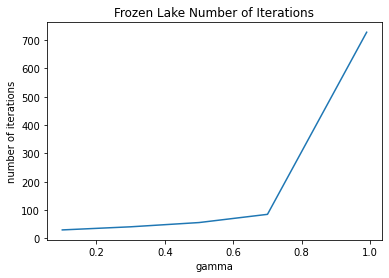

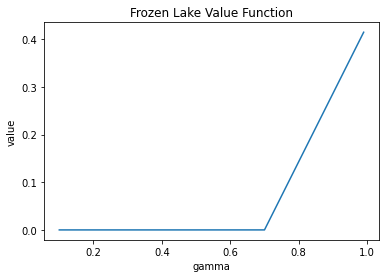

In [3]:
env = gym.make('FrozenLake8x8-v1')
start_state = env.reset()

gamma_list = [0.1,0.3,0.5,0.7,0.99]

fl_vi_policy = []
fl_vi_values = []

fl_vi_num_iterations_list = []
fl_vi_start_state_value_list = []
fl_vi_tt = []

for i in gamma_list:
  value_function, num_iterations,time_taken = valueIteration(env,gamma=i,theta=1e-064)

  fl_vi_tt.append(time_taken)
  fl_vi_num_iterations_list.append(num_iterations)
  fl_vi_start_state_value_list.append(value_function[start_state])
  fl_vi_values.append(value_function)

  policy = getPolicy(env,value_function,gamma=i)
  fl_vi_policy.append(policy)

  print('Gamma=',i)

  print('Number of Iterations')
  print(num_iterations)

  print('Policy')
  print(np.reshape(policy,(8,8)))

  print('Value Function')
  print(value_function)
  

plt.plot(gamma_list,fl_vi_num_iterations_list)
plt.title('Frozen Lake Number of Iterations')
plt.xlabel('gamma')
plt.ylabel('number of iterations')
plt.show()

plt.plot(gamma_list,fl_vi_start_state_value_list)
plt.title('Frozen Lake Value Function')
plt.xlabel('gamma')
plt.ylabel('value')
plt.show()

**Value Iteration on Taxi Environment**

Gamma= 0.1
Number of Iterations
5
Policy
[4 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 4 0 4 0 0 0 0 0 0 0 0 0 5 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 2 0 2 1 0
 0 0 0 2 0 0 0 0 3 0 0 0 0 2 1 2 3 2 3 0 0 0 0 2 0 0 0 0 3 0 0 0 0 2 3 2 3
 2 3 0 0 0 0 2 0 0 0 0 3 0 0 0 0 0 3 2 3 0 3 0 0 0 0 1 0 0 0 0 3 0 0 0 0 0
 3 1 3 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 2 0 0 0 0 1 0 0
 0 0 2 1 2 1 2 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 2 0 0 0 0
 1 0 0 0 0 0 1 2 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0
 0 4 0 4 0 0 0 0 0 1 0 5 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2 1 2 1 2 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 2 0 0 0 0 0 0 0 

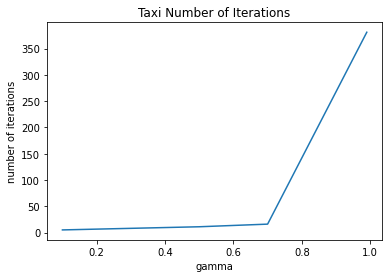

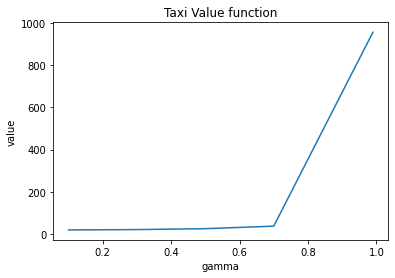

In [4]:
env = gym.make('Taxi-v3')
gamma_list = [0.1,0.3,0.5,0.7,0.99]
taxi_vi_num_iterations_list = []
taxi_vi_max_value_list = []
taxi_vi_tt = []

for i in gamma_list:
  value_function, num_iterations,time_taken = valueIteration(env,gamma=i,theta=0.01)

  taxi_vi_tt.append(time_taken)
  taxi_vi_num_iterations_list.append(num_iterations)
  taxi_vi_max_value_list.append(np.amax(value_function))

  policy = getPolicy(env,value_function,gamma=i)

  print('Gamma=',i)

  print('Number of Iterations')
  print(num_iterations)

  print('Policy')
  print(policy)
  
  print('Value Function')
  print(value_function)
  


plt.plot(gamma_list,taxi_vi_num_iterations_list)
plt.title('Taxi Number of Iterations')
plt.xlabel('gamma')
plt.ylabel('number of iterations')
plt.show()

plt.plot(gamma_list,taxi_vi_max_value_list)
plt.title('Taxi Value function')
plt.xlabel('gamma')
plt.ylabel('value')
plt.show()

**Observations**

Different values of gamma give different policies. Reason behind this is that different gamma means different goal. \
Lower gamma means that agent is trying to maximise reward in immediate future while higher value of gamma implies that agent is trying to maximise discounted return in long run. \
For higher gamma, returns are higher.

# **Policy Iteration**

In [5]:
class PolicyIteration:
  def __init__(self,env):
    self.env = env
    self.max_evaluation_iteration = 100000
    
  def initialization(self):
    self.num_states = self.env.observation_space.n
    self.value_function = np.zeros(self.num_states)
    self.policy = np.zeros(self.num_states)

  def calculate_action_value(self,state,action):
    try:
      probability_distribution = self.env.env.P[state][action]
    except:
      probability_distribution = self.env.P[state][action]
    new_value = 0
    for i in probability_distribution:
      probab = i[0]
      reward = i[2]
      next_state = i[1]
      new_value = new_value+probab*(reward+(self.gamma*self.value_function[next_state]))
    return new_value

  def bellman_update(self,state):
    action = self.policy[state]
    new_value = self.calculate_action_value(state,action)
    self.value_function[state] = new_value

  def policy_evaluation(self,theta):
    num_iterations = 0
    while num_iterations<self.max_evaluation_iteration:
      delta =0
      num_iterations+=1
      for i in range(self.num_states):
        old_value = self.value_function[i]
        self.bellman_update(i)
        delta = max(delta,abs(old_value-self.value_function[i]))
      if delta<theta:
        break
    return num_iterations
  
  def policy_improvement(self):
    policy_stable = True
    for i in range(self.num_states):
      old_action = self.policy[i]
      num_actions = self.env.action_space.n
      action_values = np.zeros(num_actions)
      for j in range(num_actions):
        action_values[j] = self.calculate_action_value(i,j)
      new_action = np.argmax(action_values)
      if old_action!=new_action:
        self.policy[i]=new_action
        policy_stable = False
    return policy_stable
    
  def policy_iteration(self,gamma,theta,display=False):
    begin = time.time()
    self.gamma = gamma
    self.initialization()
    num_iterations = 0

    self.converged_values=[]
    while True:
      num_iterations += self.policy_evaluation(theta)
      if display:
        self.converged_values.append([i for i in self.value_function])
      if self.policy_improvement():
        break
    end = time.time()
    return num_iterations, end-begin

**Policy Iteration on Frozen Lake Environment**

gamma= 0.1
Number of iterations
161
Policy
[[1. 2. 2. 2. 2. 2. 2. 2.]
 [1. 2. 2. 3. 2. 1. 1. 1.]
 [1. 2. 0. 0. 2. 3. 2. 1.]
 [3. 2. 3. 1. 0. 0. 2. 1.]
 [3. 3. 0. 0. 2. 1. 3. 2.]
 [0. 0. 0. 1. 3. 0. 0. 2.]
 [0. 0. 1. 0. 0. 0. 0. 2.]
 [1. 1. 0. 0. 1. 1. 1. 0.]]
Value Function
[2.90471967e-18 6.09966357e-17 1.29210144e-15 2.69999468e-14
 5.26614876e-13 7.61779498e-12 9.54734125e-11 6.08620831e-10
 2.32402346e-17 4.76800995e-16 1.04709951e-14 2.56383579e-13
 7.65403644e-12 1.25442642e-10 2.16010813e-09 1.70413833e-08
 1.97165808e-16 3.77203815e-15 5.64541710e-14 0.00000000e+00
 1.03651837e-10 1.59551708e-09 4.76364181e-08 4.92040006e-07
 1.94577028e-15 5.62301724e-14 1.67938210e-12 5.02687786e-11
 1.50638398e-09 0.00000000e+00 9.34892427e-07 1.42215238e-05
 1.96441563e-16 3.75103506e-15 5.61044378e-14 0.00000000e+00
 4.50375986e-08 9.04189927e-07 1.37776126e-05 4.11489297e-04
 7.62079783e-18 0.00000000e+00 0.00000000e+00 1.48642558e-08
 4.45431648e-07 1.33030476e-05 0.00000000e+00 1.191896

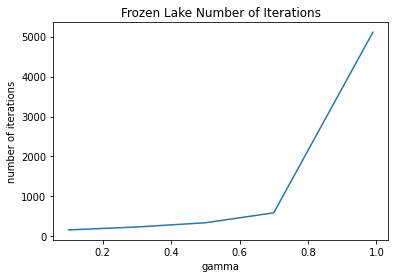

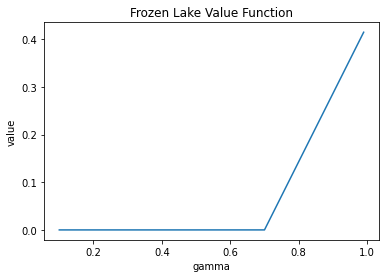

In [6]:
env = gym.make('FrozenLake8x8-v1')
start_state = env.reset()

agent = PolicyIteration(env)

gamma_list = [0.1,0.3,0.5,0.7,0.99]

fl_pi_num_iterations_list = []
fl_pi_start_state_value_list = []
fl_pi_tt = []

for i in gamma_list:
  num_iterations,time_taken = agent.policy_iteration(i,1e-64)

  
  fl_pi_num_iterations_list.append(num_iterations)
  fl_pi_start_state_value_list.append(agent.value_function[start_state])
  fl_pi_tt.append(time_taken)
  
  policy = agent.policy

  print('gamma=',i)

  print('Number of iterations')
  print(num_iterations)

  print('Policy')
  print(np.reshape(policy,(8,8)))

  print('Value Function')
  print(agent.value_function)


plt.plot(gamma_list,fl_pi_num_iterations_list)
plt.title('Frozen Lake Number of Iterations')
plt.xlabel('gamma')
plt.ylabel('number of iterations')
plt.show()

plt.plot(gamma_list,fl_pi_start_state_value_list)
plt.title('Frozen Lake Value Function')
plt.xlabel('gamma')
plt.ylabel('value')
plt.show()

**Policy Iteration on Taxi Environment**

gamma= 0.1
Number of iterations
31
Policy
[4. 4. 4. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 0. 0. 0. 3. 3. 3. 3.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 2. 2. 2. 2.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 2. 2. 2. 2. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 4. 4. 4. 4. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 5. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 2. 2. 2. 2. 0. 0. 0. 0. 2. 2. 2. 2.
 1. 2. 0. 2. 1. 1. 1. 1. 2. 2. 2. 2. 3. 3. 3. 3. 2. 2. 2. 2. 1. 2. 3. 2.
 3. 3. 3. 3. 1. 1. 1. 1. 3. 3. 3. 3. 2. 2. 2. 2. 3. 1. 3. 2. 3. 3. 3. 3.
 1. 1. 1. 1. 3. 3. 3. 3. 0. 0. 0. 0. 3. 1. 3. 0. 3. 3. 3. 3. 1. 1. 1. 1.
 3. 3. 3. 3. 0. 0. 0. 0. 3. 1. 3. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 1. 1. 1.

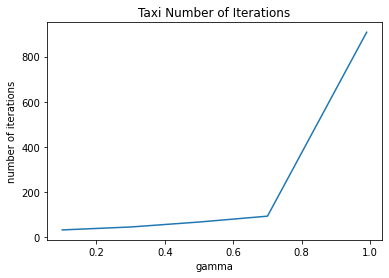

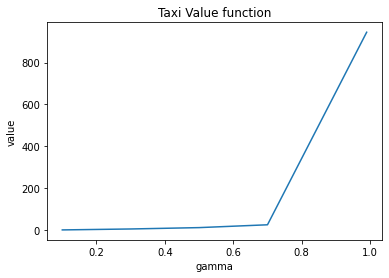

In [7]:
env = gym.make('Taxi-v3')
agent = PolicyIteration(env)

gamma_list = [0.1,0.3,0.5,0.7,0.99]

taxi_pi_num_iterations_list = []
taxi_pi_max_state_value_list = []
taxi_pi_tt = []

for i in gamma_list:
  num_iterations,time_taken = agent.policy_iteration(i,0.01)
  
  taxi_pi_num_iterations_list.append(num_iterations)
  taxi_pi_max_state_value_list.append(np.max(agent.value_function[start_state]))
  taxi_pi_tt.append(time_taken)

  policy = agent.policy
  
  print('gamma=',i)

  print('Number of iterations')
  print(num_iterations)

  print('Policy')
  print(policy)

  print('Value Function')
  print(agent.value_function)


plt.plot(gamma_list,taxi_pi_num_iterations_list)
plt.title('Taxi Number of Iterations')
plt.xlabel('gamma')
plt.ylabel('number of iterations')
plt.show()

plt.plot(gamma_list,taxi_pi_max_state_value_list)
plt.title('Taxi Value function')
plt.xlabel('gamma')
plt.ylabel('value')
plt.show()

**Observation**

Policy converges before value function. We can see that by comparing value function of policy iteration and value iteration. In some states, value returned by value iteration is slightly larger than value returned by policy iteration. This is because policy has converged before convergence of value.

**Policy Iteration vs Value Iteration**

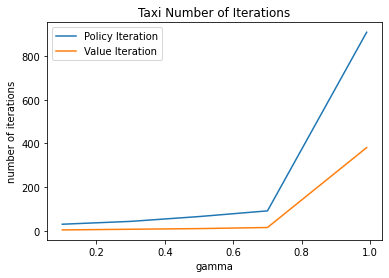

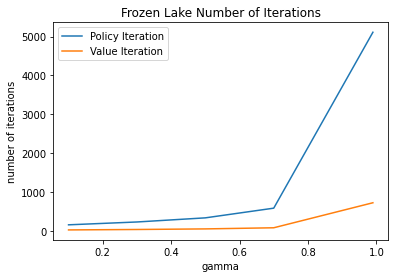

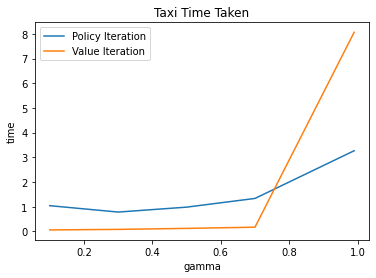

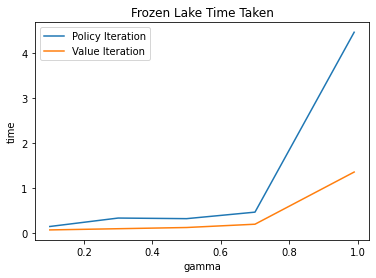

In [8]:
plt.plot(gamma_list,taxi_pi_num_iterations_list,label='Policy Iteration')
plt.plot(gamma_list,taxi_vi_num_iterations_list,label='Value Iteration')
plt.title('Taxi Number of Iterations')
plt.xlabel('gamma')
plt.ylabel('number of iterations')
plt.legend()
plt.show()

plt.plot(gamma_list,fl_pi_num_iterations_list,label='Policy Iteration')
plt.plot(gamma_list,fl_vi_num_iterations_list,label='Value Iteration')
plt.title('Frozen Lake Number of Iterations')
plt.xlabel('gamma')
plt.ylabel('number of iterations')
plt.legend()
plt.show()

plt.plot(gamma_list,taxi_pi_tt,label='Policy Iteration')
plt.plot(gamma_list,taxi_vi_tt,label='Value Iteration')
plt.title('Taxi Time Taken')
plt.xlabel('gamma')
plt.ylabel('time')
plt.legend()
plt.show()

plt.plot(gamma_list,fl_pi_tt,label='Policy Iteration')
plt.plot(gamma_list,fl_vi_tt,label='Value Iteration')
plt.title('Frozen Lake Time Taken')
plt.xlabel('gamma')
plt.ylabel('time')
plt.legend()
plt.show()

*Value Iteration* uses **less number of iterations** than *Policy Iteration*.

The reason behind value iteration taking less number of iterations is:
It combines the policy evaluation and policy improvement step,hence converging faster.

However in some cases, especialy where action space is large, Value iteration takes more time as it requires taking argmax over all actions while Policy iteration calculates for only one action(because we consider only deterministic policies).

# **Monte Carlo**

In [9]:
class MonteCarlo:

  def __init__(self,env,max_interaction):
    self.env = env
    self.max_interaction = max_interaction

  def initialisation(self):
    self.num_states = self.env.observation_space.n
    self.value_function = np.zeros(self.num_states)
    self.num_visits = np.zeros(self.num_states)

  def generate_episode(self,policy):
    episode = []
    state = env.reset()
    done = False
    num_interaction = 0
    first_visit_index = {}
    while not done and num_interaction<self.max_interaction:
      num_interaction += 1
      action = policy[state]
      next_state,reward,done,info = self.env.step(action)
      if state not in first_visit_index.keys():
        first_visit_index[state] = num_interaction-1

      episode.append([state,action,reward])
      state = next_state

    return episode, first_visit_index

  def prediction(self,policy,gamma,max_episodes=100000):
    self.initialisation()
    num_episode = 0
    while num_episode < max_episodes:
      num_episode += 1
      episode, first_visit_index = self.generate_episode(policy)
      num_interaction = len(episode)

      G =0
      for i in reversed(range(num_interaction)):
        interaction = episode[i]
        state = int(interaction[0])
        action = int(interaction[1])
        reward = interaction[2]
        G = gamma*G + reward
        if first_visit_index[state]==i:
          self.value_function[state] = (self.value_function[state]*self.num_visits[state]+G)/(self.num_visits[state]+1)
          self.num_visits[state]+=1 
      


     

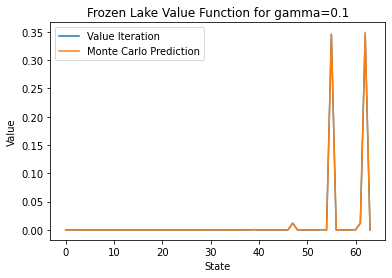

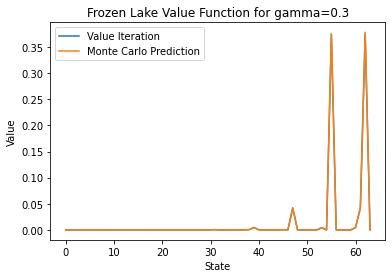

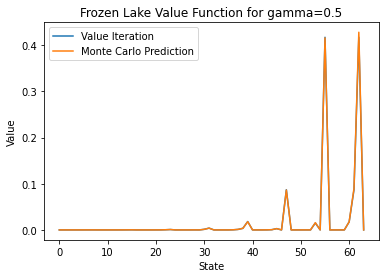

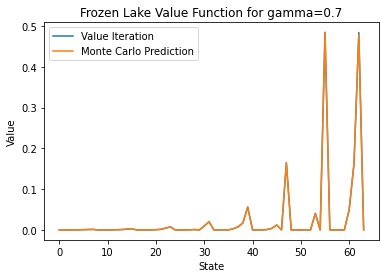

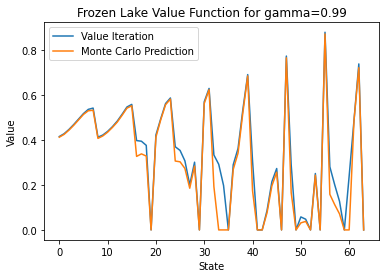

In [10]:
env = gym.make('FrozenLake8x8-v1')
num_states = env.observation_space.n
start_state = env.reset()
fl_mc_value_function = []
monte_carlo = MonteCarlo(env,10000)
for i in range(len(gamma_list)):
  monte_carlo.prediction(fl_vi_policy[i],gamma_list[i])
  fl_mc_value_function.append(monte_carlo.value_function[start_state])
  plt.plot(list(range(num_states)),fl_vi_values[i],label='Value Iteration')
  plt.plot(list(range(num_states)),monte_carlo.value_function,label='Monte Carlo Prediction')
  plt.title('Frozen Lake Value Function for gamma='+str(gamma_list[i]))
  plt.xlabel('State')
  plt.ylabel('Value')
  plt.legend()
  plt.show()

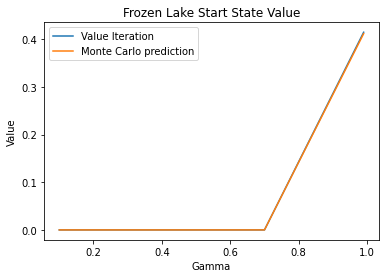

In [11]:
plt.plot(gamma_list,fl_vi_start_state_value_list,label='Value Iteration')
plt.plot(gamma_list,fl_mc_value_function,label='Monte Carlo prediction')
plt.title('Frozen Lake Start State Value')
plt.xlabel('Gamma')
plt.ylabel('Value')
plt.legend()
plt.show()


**Observations**

Value function in case of value iteration and monte carlo are approximately equal except for large value of gamma. This happens because in case of large gamma, if sequence of interaction varies in number of episodes it have an considerable effect on the value function.

#RL Agent playing Kaun Banega Crorepati (KBC)

Let us create an RL agent to play the KBC. We will consider that there are only 10 levels (restricting our agent to win only ₹3,20,000/- as per the 2022 KBC format). As you might be aware, at each level Mr. Amitabh Bachchan asks one question and four options are provided. If our agent answers correctly then the agent wins an amount based on the current level (it starts with ₹1,000/-). As the levels increase, the questions get tough to answer however the reward money also increases.

At every level, after answering the question correctly, our agent can decide whether to play at the next level or quit. If quit option is choosen then all the money earned so far can be kept as reward and the game ends. However, at any round if our agent chooses to play and then fails to answer correctly then all the money earned so far is lost and the game ends. The goal is to generate a policy in order to accumulate the maximum amount of money from KBC. 

Lets say the money at each level are (as per the KBC game show):

1. ₹1,000
2. ₹2,000
3. ₹3,000
4. ₹5,000
5. ₹10,000
6. ₹20,000
7. ₹40,000
8. ₹80,000
9. ₹1,60,000
10. ₹3,20,000

The probability of winning at each level is given as : 0.99, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1 (the probability of loosing at any level can be accordingly determined)


#Questions:

1. Formulate the above problem as an MDP; mention all the key components. **[5 points]**

2. Generate an optimal policy using policy iteration (Intialize with a random policy and perform policy iteration until the policy converges). **[10 points]**

3. Print a table of V(s) value of each state for each iteration of converged policy evaluation and precisely comment on noticeable observations. **[5 points]**


**MDP**

The above problem can be translated as an MDP with following components:

State Space : 11 states, 10(0-9) representing each level of game and one quit/terminal state(10)

Action Space : 2 actions, play(0) or quit(1).

Rewards : If answer is incorrect, it gets negative reward as total money/reward win til that level. If agent is in level 2 and answer is incorrect, it gets negative reward of 1000.If agent quits, it get zero reward. If answer is correct, reward it gets is extra amount it earns. For example, for correctly giving answer in level 4, reward is 2000.

Start State : always 0. 

Transition Function: If agent quits, it goes to state 10 with probability 1.
                     If agent plays, it goes to next level with probability of answer being correct and goes to state 10 with probability of answer being incorrect. 

In [12]:
class KBCEnv(Env):

  def __init__(self):
    super(KBCEnv, self).__init__()
    num_states = 11
    num_actions = 2
    self.observation_space = spaces.Discrete(num_states)
    self.action_space = spaces.Discrete(num_actions)
    self.P = {}
    probab = [0.99,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]
    rewards = [0,1000,2000,3000,5000,10000,20000,40000,80000,160000,320000]
    for i in range(num_states):
      self.P[i] = {}
      for j in range(num_actions):
        self.P[i][j]=[]
    for i in range(num_states-1):
      self.P[i][1].append((1.0000,10,0,True))
      self.P[i][0].append((probab[i],i+1,rewards[i+1]-rewards[i],i+1==10))
      self.P[i][0].append((1-probab[i],10,-1*rewards[i],True))
    
  def reset(self):
    self.current_state =0
    return self.current_state
  
  def step(self,action):
    if self.current_state ==10:
      return 10,0,True,{}
    assert self.action_space.contains(action), "Invalid Action"
    random_number = np.random.random()
    for i in self.P[self.current_state][action]:
      if random_number <= i[0]:
        self.current_state= i[1]
        return i[1],i[2],i[3],{}
      else:
        random_number = random_number - i[0]

  def render(self):
    print('Current State:',self.current_state)    

    


In [13]:
env = KBCEnv()
agent = PolicyIteration(env)
num_iterations,time_taken = agent.policy_iteration(1,0.01,display=True)
print('Policy')
print(agent.policy)

Policy
[0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0.]


In [14]:
df = pd.DataFrame(agent.converged_values)
df.index = np.arange(1, len(df) + 1)
print('Value Function after each Iteration')
print('rows represent number of iteration')
print('columns represent state')
print(df.to_markdown())

Value Function after each Iteration
rows represent number of iteration
columns represent state
|    |       0 |        1 |        2 |        3 |       4 |     5 |      6 |      7 |      8 |       9 |   10 |
|---:|--------:|---------:|---------:|---------:|--------:|------:|-------:|-------:|-------:|--------:|-----:|
|  1 |  114.96 | -883.878 | -1870.98 | -2838.72 | -4769.6 | -9616 | -19232 | -38080 | -73600 | -128000 |    0 |
|  2 |  990    |    0     |     0    |     0    |     0   |     0 |      0 |      0 |      0 |       0 |    0 |
|  3 | 2993.76 | 2024     |  1360    |  1200    |  1000   |     0 |      0 |      0 |      0 |       0 |    0 |


**Observations**

Since action space is not very large, policy iteration tries very few policies before converging to optimal policy. Every iteration takes it to a better policy

#Managing a Warehouse

Assume, you are the manager of a warehouse where you need to keep the inventory of the stocks as per the expected customer demand.  For simplicity, let's assume you manage maximum 15 units of only 1 product in the warehouse . At the end of each day, you look at the stock in hand $s_t$. The decision to order additional units of the product is then made at the end of every day and the delivery happens by next day early morning. 

The demand for the product arrives throughtout the day which is immediately serviced. Products are sold in whole units. The total demand thoughout the day is Poisoon distributed with mean rate of 5 units. In case, the demand exceeds the inventory, the extra demand is lost.

There is a fixed cost K=5 and a variable cost $c(u) = 2u$ for placing an order of $u$ units ($C(u) = K+c(u)$, if $u=0$ then $C(u) = 0$). Further, there is a holding cost $h(u) = u$ for each item in inventory at the end of the day. For each unit sold, the revenue is $f(u) = 8u$.

The reward function over the current state and action $(s,a)$ is given as:

$ r_t(s, a) = F(s+a) - C(a) - h(s+a)$

where, $F(u)$ is the expected revenue from the available units $u$ given as:

$F(u) = ∑_{j=0}^{u-1} f(j)p_j + f(u)q_u$

$q_u = \sum_{j=u}^{∞}p_j$ \\
$q_u$ is the probability with which demand exceeds the inventory

The transition probability is given as:

$
T(j|s,a)  =\left\{
\begin{align} 
            &  0, \text{if}~ j>s+a \\
            & p_{s+a-j}, \text{if}~ s+a \geq j > 0 \\
            & q_{s+a}, \text{if}~  j = 0 
\end{align}
\right.
$


#Questions

1. Formulate the above problem as an MDP; mention all the key components and Print the reward and transition matrix. [5 points]

2. Run value iteration to find a policy for optimal ordering of the stocks in order to maximize the revenue. [10 points]

3. Make a table for each iteration of value iteration mentioning the gap between successive value vectors and maximum value function of a state in that iteration. Print the final policy that your model finds. [5 marks]


**MDP**

The above problem can be translated as an MDP with following components:

State Space : 16 states(0-15), each representing inventory at the end of the day 

Action Space : 16 actions(0-15), each representing number of items ordered.

Rewards : if environment was in state s and agent takes action a, suppose it goes to state s'. agent gets reward equal to order cost and holding cost subtracted from revenue. 

Start State : can be any state from state space.

Transition Function: probability of going to state s' when environment was in state s and agent takes action a is equal to probability of demand coming s+a-s'.(Except when s' is 0, in which case, this probability is equal to probability of demand being greater than or equal to s+a-s')

In [15]:
class WareHouseEnv(Env):

  def __init__(self):
    super(WareHouseEnv, self).__init__()
    self.num_states = 16
    self.num_actions = 16
    self.observation_space = spaces.Discrete(self.num_states)
    self.action_space = spaces.Discrete(self.num_actions)
    self.P = {}
    self.mean = 5
    
    for i in range(self.num_states):
      self.P[i] = {}
      for j in range(self.num_actions):
        self.P[i][j]=[]
      
    for i in range(self.num_states):
      for j in range(self.num_actions-i):
        for l in range(i+j+1):
          if l==0:
            probab = 1-poisson.cdf(k=i+j-1,mu=self.mean)
          else:
            probab = poisson.pmf(k=i+j-l,mu=self.mean)
          self.P[i][j].append((probab,l,self.get_reward(i,j,l),False))

  def get_revenue(self,demand):
    return 8*demand

  def get_cost(self,action):
    if action==0:
      return 0
    return 5+2*action
  
  def get_holding_cost(self,units):
    return units

  def get_reward(self,state,action,next_state):
    return self.get_revenue(state+action-next_state)-self.get_cost(action)-self.get_holding_cost(state+action)

    
  def reset(self):
    self.current_state = np.random.randint(0,self.observation_space.n)
    return self.current_state
  
  def step(self,action):
    assert len(self.P[self.current_state][action])>0, "Invalid Action"
    random_number = np.random.random()
    for i in self.P[self.current_state][action]:
      if random_number <= i[0]:
        self.current_state = i[1]
        return i[1],i[2],i[3],{}
      else:
        random_number = random_number - i[0]
     
  def render(self):
    print('Current Inventory:',self.current_state) 

  def display_reward(self):
    reward = [[] for i in range(self.num_states)]
    for i in range(self.num_states):
      for j in range(self.num_actions):
        if len(self.P[i][j])==0:
          reward[i].append('NA')
        else:
          r = 0
          for p in self.P[i][j]:
            r = r+p[0]*p[2]
          reward[i].append(r)
    print('Reward Matrix')
    print('Rows represent state')
    print('Column represent action')
    print(pd.DataFrame(reward).to_markdown())

  def display_transition(self):
    transition_matrix = [[0]*16 for _ in range(136)]
    index = []
    count = 0
    for i in range(self.num_states):
      for j in range(self.num_actions-i):
        index.append((i,j))
        for p in self.P[i][j]:
          transition_matrix[count][p[1]] += p[0]
        count +=1
    print('Transition Matrix')
    print('Rows represent (state,action)')
    print('Columns represent next state')
    print(pd.DataFrame(transition_matrix,index).to_markdown())



In [16]:
env = WareHouseEnv()
env.display_reward()
print('')
env.display_transition()


Reward Matrix
Rows represent state
Column represent action
|    |       0 | 1                     | 2                  | 3                  | 4                  | 5                  | 6                  | 7                  | 8                  | 9                  | 10                     | 11                    | 12                 | 13                 | 14                 | 15                  |
|---:|--------:|:----------------------|:-------------------|:-------------------|:-------------------|:-------------------|:-------------------|:-------------------|:-------------------|:-------------------|:-----------------------|:----------------------|:-------------------|:-------------------|:-------------------|:--------------------|
|  0 |  0      | -0.053903575992683736 | 4.622674968051213  | 8.625458812186565  | 11.505251489807675 | 12.981305209285967 | 13.05361997062147  | 11.956152266837952 | 10.023125659398017 | 7.56787473717279   | 4.822499195622437      | 1.9320613444094965   

In [17]:
valueFunction, numIterations,time_taken = valueIteration(env,gamma=0.99,theta=0.01,display=True)
policy = getPolicy(env,valueFunction,gamma=0.99)
print('Policy Found')
print(policy)

Change and maximum value after every iteration
|     |       delta |   max. value |
|----:|------------:|-------------:|
|   1 | 98.9727     |      98.9727 |
|   2 | 51.5793     |     148.258  |
|   3 | 48.9542     |     195.558  |
|   4 | 47.2868     |     241.25   |
|   5 | 45.6805     |     285.389  |
|   6 | 44.1288     |     328.029  |
|   7 | 42.6298     |     369.22   |
|   8 | 41.1818     |     409.012  |
|   9 | 39.7829     |     447.453  |
|  10 | 38.4315     |     484.587  |
|  11 | 37.126      |     520.461  |
|  12 | 35.8649     |     555.143  |
|  13 | 34.674      |     588.711  |
|  14 | 33.561      |     621.202  |
|  15 | 32.4836     |     652.65   |
|  16 | 31.4409     |     683.088  |
|  17 | 30.4316     |     712.549  |
|  18 | 29.4547     |     741.065  |
|  19 | 28.5092     |     768.665  |
|  20 | 27.594      |     795.379  |
|  21 | 26.7082     |     821.235  |
|  22 | 25.8508     |     846.274  |
|  23 | 25.0331     |     870.522  |
|  24 | 24.243      |     89